# <center> Latest Covid-19 India Statewise Data </center>

for data refer to this 
https://www.kaggle.com/anandhuh/latest-covid19-india-statewise-data


In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra 
import pandas as pd # data processing, csv file I/O e.g.. pd.read_csv()
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [4]:
import plotly.offline as pyo
pyo.init_notebook_mode()

In [6]:
main_df = pd.read_csv('Latest Covid-19 India Status.csv')
df = main_df.copy()
df.head()

State/UTs  Total Cases  Active  Discharged  Deaths  \
0  Andaman and Nicobar         7560      10        7421     129   
1       Andhra Pradesh      2004590   13677     1977163   13750   
2    Arunachal Pradesh        52409    1127       51023     259   
3                Assam       585689    8005      572084    5600   
4                Bihar       725605     102      715853    9650   

   Active Ratio (%)  Discharge Ratio (%)  Death Ratio (%)  
0              0.13                98.16             1.71  
1              0.68                98.63             0.69  
2              2.15                97.36             0.49  
3              1.37                97.68             0.96  
4              0.01                98.66             1.33

EDA 

In [7]:
df.shape

(36, 8)

In [8]:
df.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio (%)', 'Discharge Ratio (%)', 'Death Ratio (%)'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [11]:
df = df.replace('Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu')
df.head(8)

State/UTs  Total Cases  Active  Discharged  Deaths  \
0  Andaman and Nicobar         7560      10        7421     129   
1       Andhra Pradesh      2004590   13677     1977163   13750   
2    Arunachal Pradesh        52409    1127       51023     259   
3                Assam       585689    8005      572084    5600   
4                Bihar       725605     102      715853    9650   
5           Chandigarh        65069      35       64222     812   
6         Chhattisgarh      1004230     653      990022   13555   
7        Daman and Diu        10659       4       10651       4   

   Active Ratio (%)  Discharge Ratio (%)  Death Ratio (%)  
0              0.13                98.16             1.71  
1              0.68                98.63             0.69  
2              2.15                97.36             0.49  
3              1.37                97.68             0.96  
4              0.01                98.66             1.33  
5              0.05                98.70             1.25  
6              0.07                98.59             1.35  
7              0.04                99.92             0.04

In [12]:
df.describe()

Total Cases         Active    Discharged         Deaths  \
count  3.600000e+01      36.000000  3.600000e+01      36.000000   
mean   9.031213e+05    8953.527778  8.820634e+05   12104.388889   
std    1.316180e+06   27649.920018  1.276942e+06   23385.359462   
min    7.560000e+03       4.000000  7.421000e+03       4.000000   
25%    7.194125e+04     158.250000  6.865075e+04     806.750000   
50%    4.667220e+05     910.000000  4.572770e+05    5366.000000   
75%    1.002800e+06    6373.000000  9.880322e+05   13603.750000   
max    6.432649e+06  159870.000000  6.243034e+06  136355.000000   

       Active Ratio (%)  Discharge Ratio (%)  Death Ratio (%)  
count         36.000000            36.000000        36.000000  
mean           1.263611            97.471667         1.265278  
std            2.313456             2.239131         0.563770  
min            0.010000            87.300000         0.040000  
25%            0.065000            97.357500         0.955000  
50%            0.570000            98.185000         1.295000  
75%            1.065000            98.652500         1.607500  
max           12.330000            99.920000         2.720000

In [13]:
df.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

<AxesSubplot:>

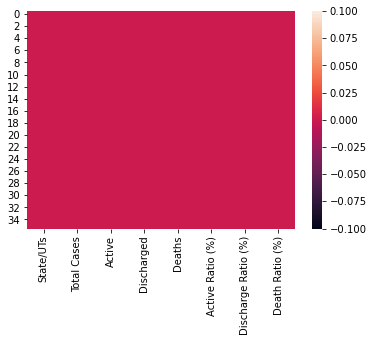

In [14]:
# visualiztion for missing value
sns.heatmap(df.isnull())

In [15]:
# checking correlations within variables

df.corr()

Total Cases    Active  Discharged    Deaths  \
Total Cases             1.000000  0.657405    0.999924  0.904746   
Active                  0.657405  1.000000    0.649104  0.373963   
Discharged              0.999924  0.649104    1.000000  0.906137   
Deaths                  0.904746  0.373963    0.906137  1.000000   
Active Ratio (%)       -0.083121  0.217516   -0.088095 -0.125013   
Discharge Ratio (%)     0.062078 -0.181338    0.066903  0.055103   
Death Ratio (%)         0.092816 -0.173172    0.094055  0.292854   

                     Active Ratio (%)  Discharge Ratio (%)  Death Ratio (%)  
Total Cases                 -0.083121             0.062078         0.092816  
Active                       0.217516            -0.181338        -0.173172  
Discharged                  -0.088095             0.066903         0.094055  
Deaths                      -0.125013             0.055103         0.292854  
Active Ratio (%)             1.000000            -0.969908        -0.251648  
Discharge Ratio (%)         -0.969908             1.000000         0.008449  
Death Ratio (%)             -0.251648             0.008449         1.000000

<AxesSubplot:>

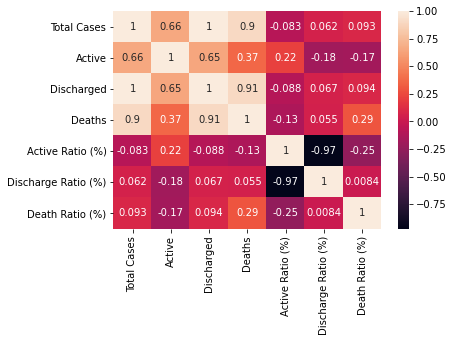

In [16]:
# Visualization of correlations within variables
sns.heatmap(df.corr(), annot=True)

## Visualization

Creating Report using Visualization

<AxesSubplot:xlabel='Total Cases', ylabel='State/UTs'>

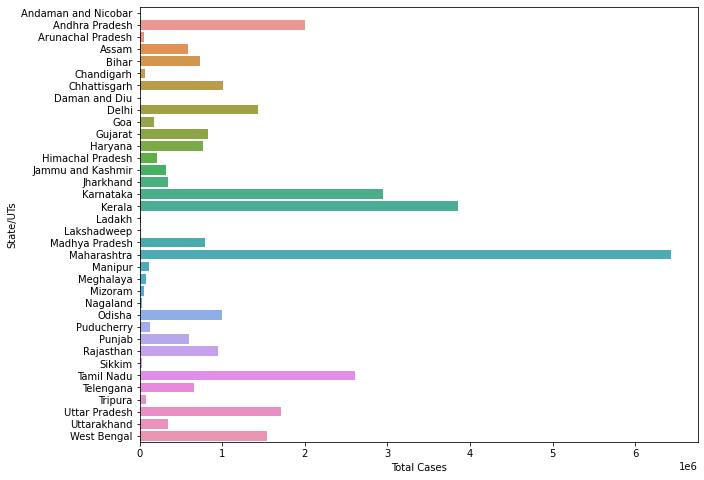

In [17]:
# Barplot using seaborn

plt.figure(figsize=(10,8))
sns.barplot(data = df, y='State/UTs', x='Total Cases')

In above plot we can see that Maharastra have maximum number of covid cases.

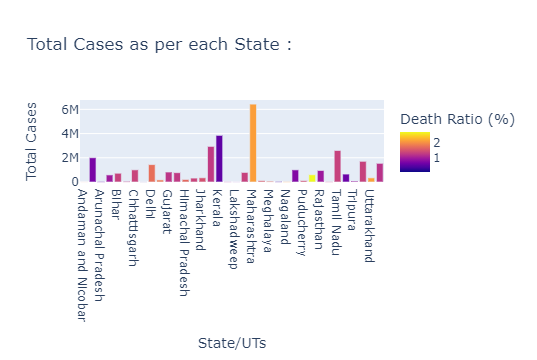

In [18]:
px.bar(df, x="State/UTs", y="Total Cases", color="Death Ratio (%)", title="Total Cases as per each State : ")

* Even after having the highest number of covid cases in maharastra its death ratio is 2.1% while other state like punjab have high death ratio i.e 2.72%
* Similarly we can compare other states with one another to make a report on Death Ratio.

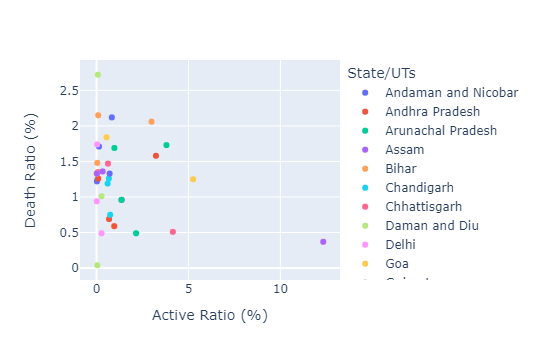

In [21]:
px.scatter(df,x='Active Ratio (%)',y='Death Ratio (%)',color=df['State/UTs'])

* Here we can see that have the highest Active Ratio i.e 24.95%.
* we can again see that Punjab have highest Death Ratio of 2.72%, while its active ratio is 0.13%.
* In similar way we can prepare a detailed report on the Active and Death Ratio.

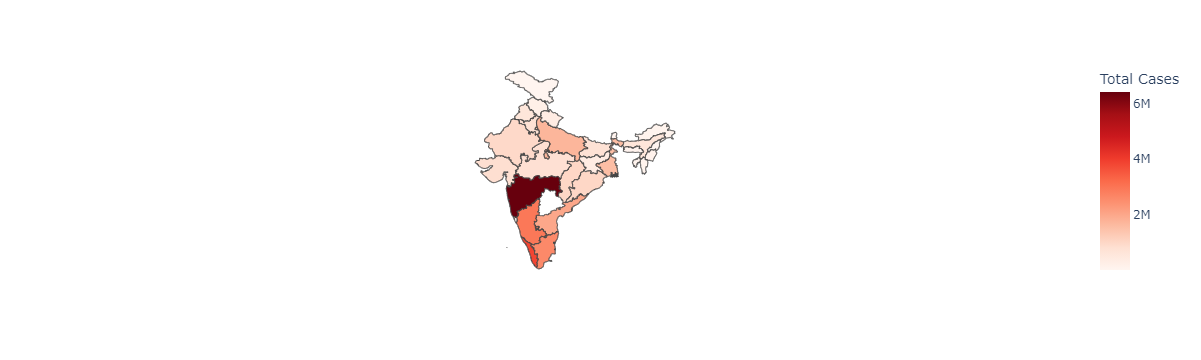

In [27]:

fig = px.choropleth(
    df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State/UTs',
    color='Total Cases',
    color_continuous_scale='Reds'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

* Here according to color bar scale the state which have higher number of cases will be dark red in color.
* Even though graph is missing few state, but even after that its giving good information via visualization.

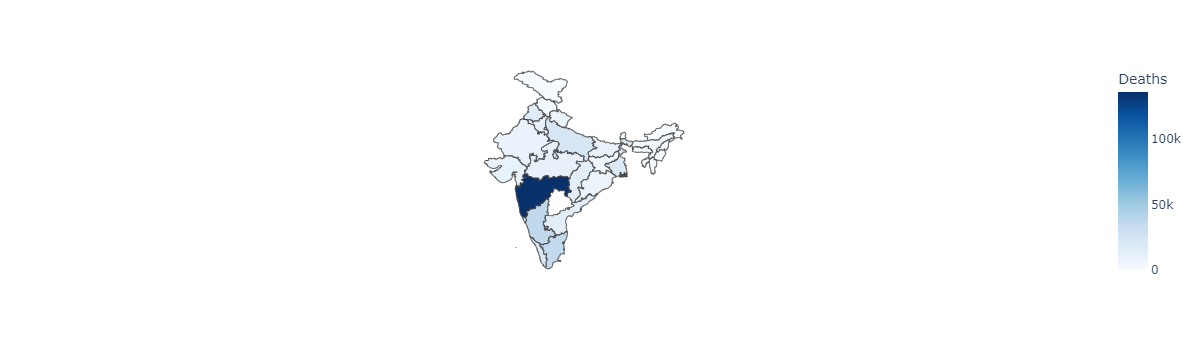

In [28]:
fig = px.choropleth(
    df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State/UTs',
    color='Deaths',
    color_continuous_scale='Blues'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

- Higher the number of death in each state more darker will the state in color.

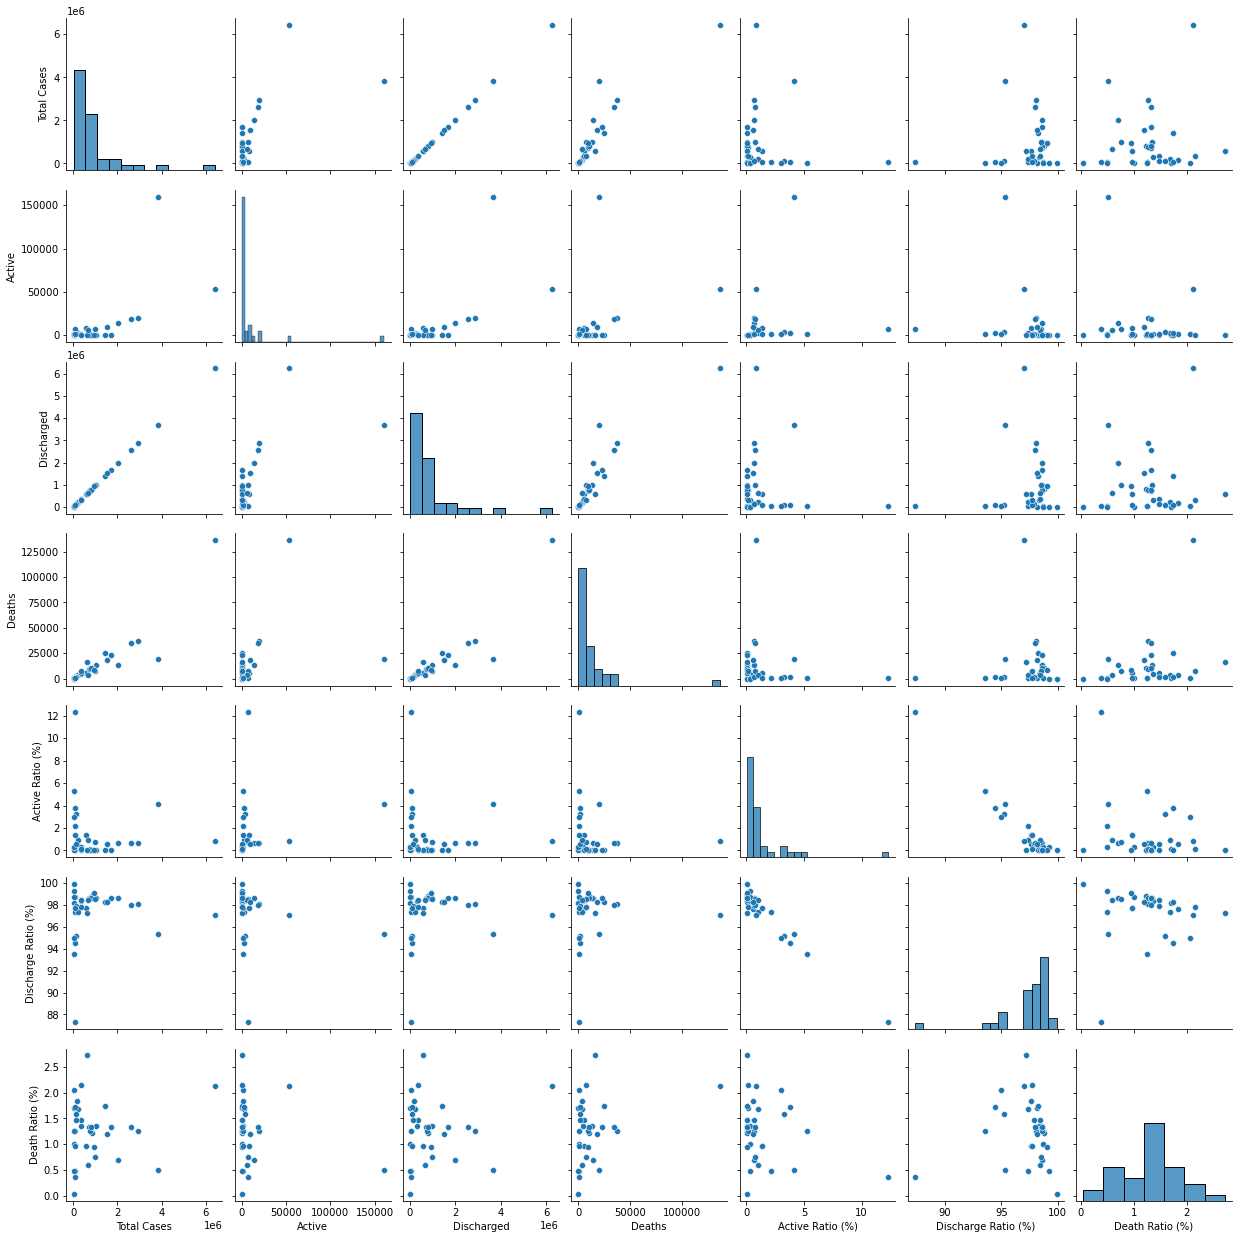

In [29]:
sns.pairplot(df)

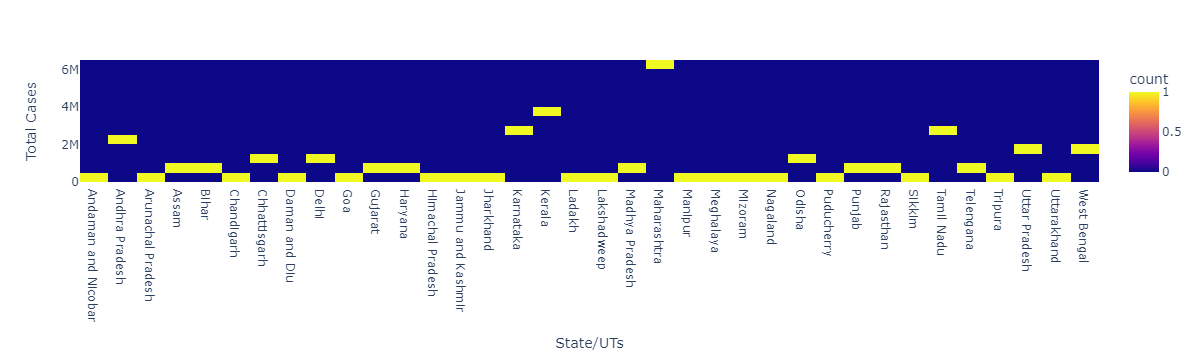

In [30]:
px.density_heatmap(df, y="Total Cases", x="State/UTs", nbinsx=20, nbinsy=20)

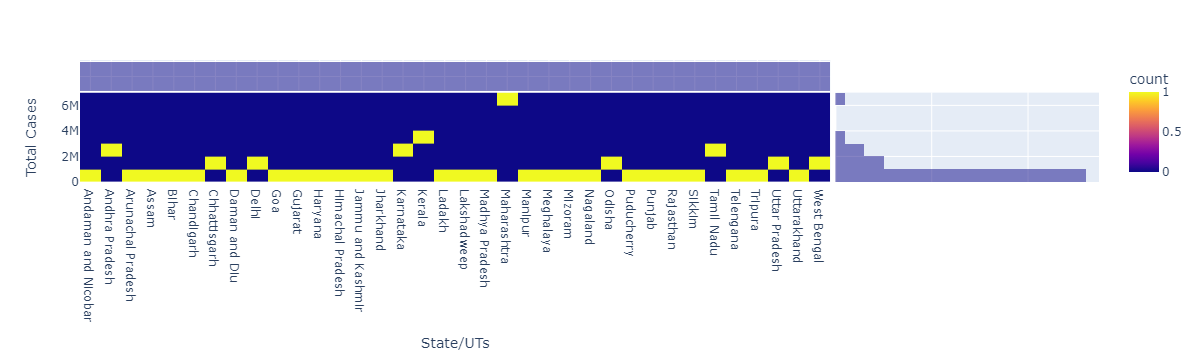

In [31]:
px.density_heatmap(df, y="Total Cases", x="State/UTs", marginal_x="histogram", marginal_y="histogram")

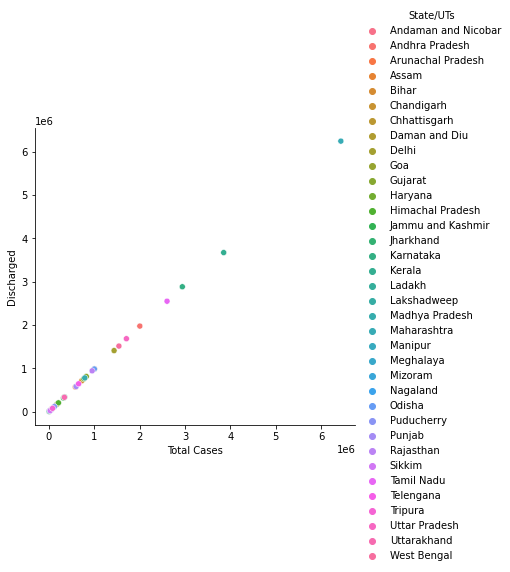

In [32]:
sns.relplot(x = 'Total Cases', y ='Discharged', hue = 'State/UTs', data = df)

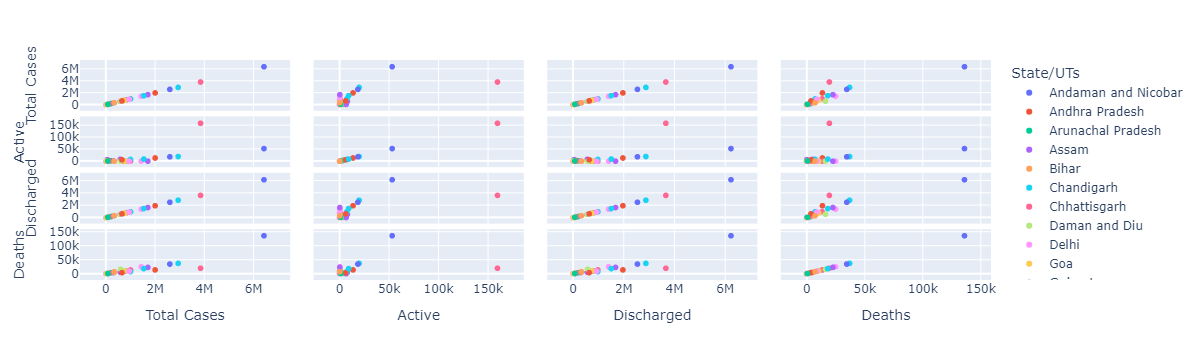

In [33]:
fig = px.scatter_matrix(df, dimensions=["Total Cases", "Active", "Discharged", "Deaths"], color=df['State/UTs'])
fig.show()

* Above graph shows us the relationship between different variables of all states of India.

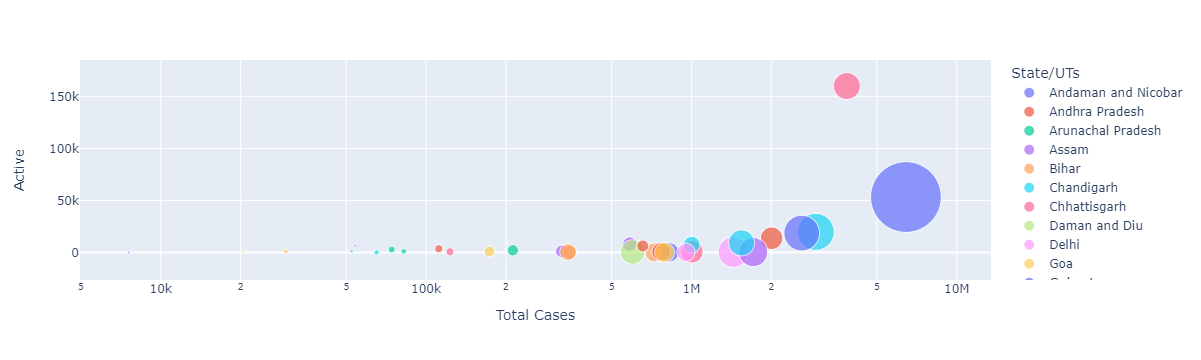

In [35]:
fig = px.scatter(df, x="Total Cases", y="Active", size="Deaths", color=df['State/UTs'], log_x=True, size_max=50)
fig.show()

* Above graph shows us that Maharastra have highest number of death.
* While Daman and Diu have lowest number of death.

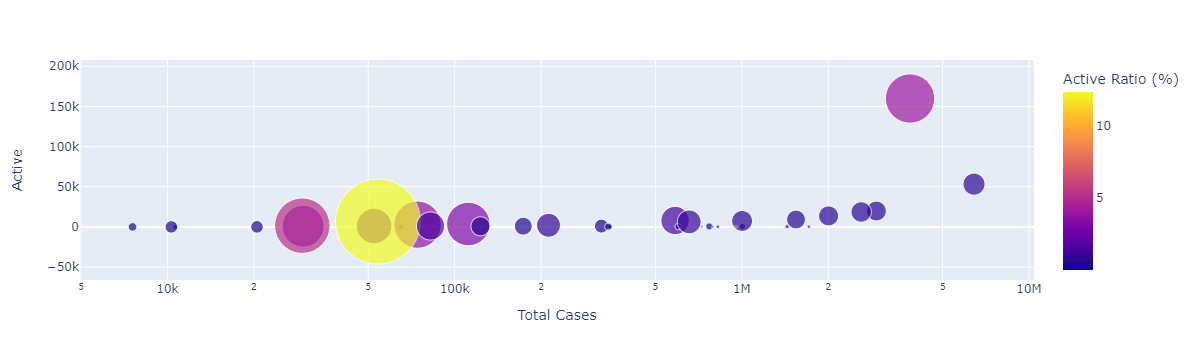

In [36]:
px.scatter(df, x="Total Cases", y="Active",size="Active Ratio (%)", color="Active Ratio (%)",hover_name="State/UTs", log_x=True, size_max=60)

* Above graph shows us that Mizoram have highest number of Active Ratio.

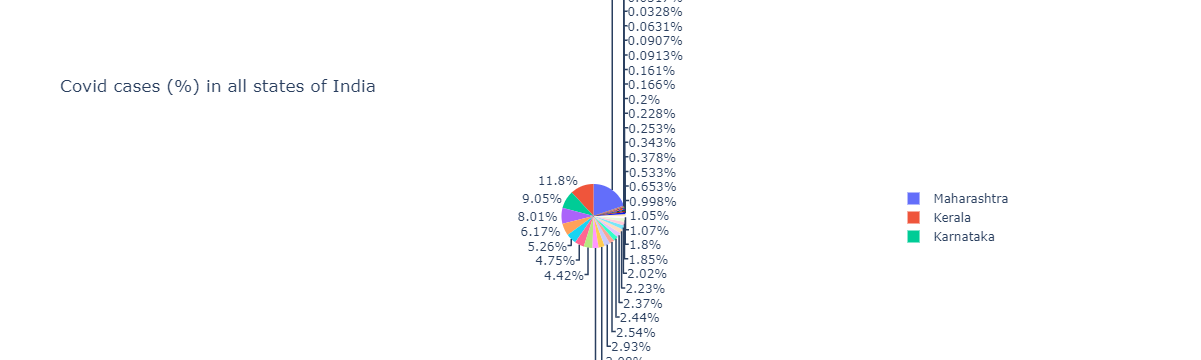

In [37]:
fig = px.pie(df, values='Total Cases', names=df['State/UTs'], title='Covid cases (%) in all states of India')
fig.show()

- Above graph shows us that more than 50% of covid cases in india are coming only from 4 to 5 states.

In [39]:
df.nunique()

State/UTs              36
Total Cases            36
Active                 36
Discharged             36
Deaths                 36
Active Ratio (%)       29
Discharge Ratio (%)    34
Death Ratio (%)        29
dtype: int64

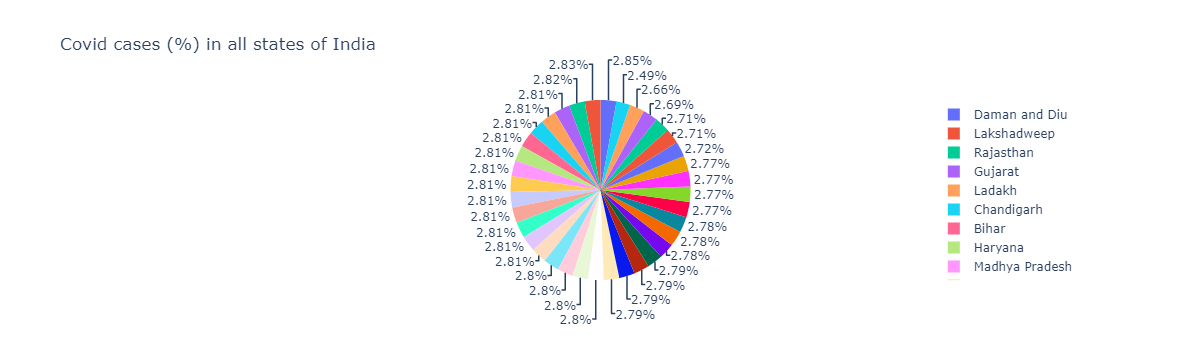

In [40]:
fig = px.pie(df, values='Discharge Ratio (%)', names=df['State/UTs'], title='Covid cases (%) in all states of India')
fig.show()

- Discharge ratio of each state is different as we can also see it from data

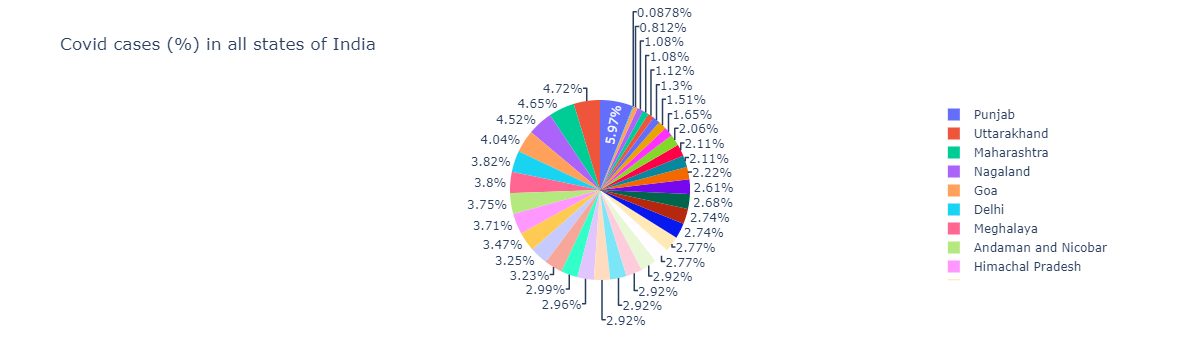

In [42]:
fig = px.pie(df, values='Death Ratio (%)', names=df['State/UTs'], title='Covid cases (%) in all states of India')
fig.show()

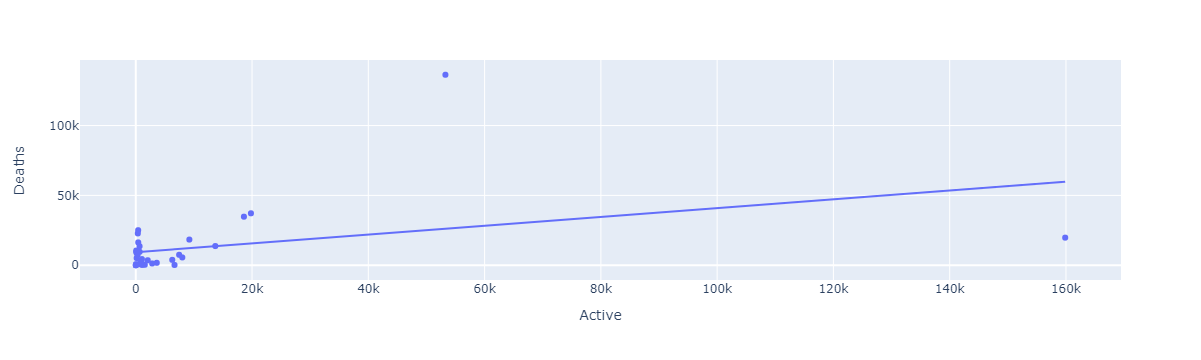

In [45]:
fig = px.scatter (df, x = "Active", y = "Deaths",  trendline="ols")
fig.show ()

### Report

Creating Report using Mathematical Calculations

In [46]:
# State having highest number of covid cases in India.

highest_cases = df[df['Total Cases'] == max(df['Total Cases'])]
highest_cases

State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio (%)  \
20  Maharashtra      6432649   53260     6243034  136355              0.83   

    Discharge Ratio (%)  Death Ratio (%)  
20                97.05             2.12

In [47]:
# State having Lowest number of covid cases in India.

lowest_cases = df[df['Total Cases'] == min(df['Total Cases'])]
lowest_cases

State/UTs  Total Cases  Active  Discharged  Deaths  \
0  Andaman and Nicobar         7560      10        7421     129   

   Active Ratio (%)  Discharge Ratio (%)  Death Ratio (%)  
0              0.13                98.16             1.71

In [48]:
# State having highest number of Active cases in India.

highest_active = df[df['Active'] == max(df['Active'])]
highest_active

State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio (%)  \
16    Kerala      3851984  159870     3672357   19757              4.15   

    Discharge Ratio (%)  Death Ratio (%)  
16                95.34             0.51

In [49]:
# State having Lowest number of Active cases in India.

lowest_active = df[df['Active'] == min(df['Active'])]
lowest_active

State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio (%)  \
7  Daman and Diu        10659       4       10651       4              0.04   

   Discharge Ratio (%)  Death Ratio (%)  
7                99.92             0.04

In [50]:
# State having highest number of death ratio in India.

highest_death_ratio = df[df['Death Ratio (%)'] == max(df['Death Ratio (%)'])]
highest_death_ratio

State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio (%)  \
27    Punjab       600342     423      583564   16355              0.07   

    Discharge Ratio (%)  Death Ratio (%)  
27                97.21             2.72

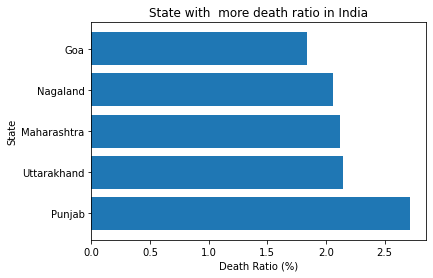

In [51]:
# Visualization of top 5 state having highest Death ratio in India.
df1 = df.sort_values(by='Death Ratio (%)', ascending=False).head()
states = df1['State/UTs']
ratio = df1['Death Ratio (%)']
plt.barh(states, ratio)
plt.xlabel('Death Ratio (%)')
plt.ylabel('State')
plt.title('State with  more death ratio in India')
plt.show()

Conclusion :- By using EDA, Visualization and Reporting we draw different conclusion from the dataset at each step.